# Tweets - exploration 

In [25]:
import pandas as pd
from datetime import datetime as dt
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [26]:
tweets = pd.read_csv('tweets_sample.csv')

In [27]:
tweets.head()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,1092603909846253568,2019-02-05 03:00:46,$GOOGL #Google's capital expenditures doubled ...,0,0,1,AMZN
1,693434415314292738,2016-01-30 15:03:42,"$TSLA is preparing for Panasonic to bail?, the...",0,0,1,TSLA
2,1113895524548136962,2019-04-04 22:06:02,Today's million dollar CALL #options trade:$AA...,0,1,0,TSLA
3,1014798540323909635,2018-07-05 11:10:00,The interesting item here is: “S/X annual prod...,2,0,10,TSLA
4,626160767276990464,2015-07-29 00:42:15,"NFLX Netflix, Inc. Summaryhttp://dlvr.it/BgVpb...",0,0,0,GOOGL


In [28]:
tweets[tweets['post_date'] < "2016-06-09"]

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
1,693434415314292738,2016-01-30 15:03:42,"$TSLA is preparing for Panasonic to bail?, the...",0,0,1,TSLA
4,626160767276990464,2015-07-29 00:42:15,"NFLX Netflix, Inc. Summaryhttp://dlvr.it/BgVpb...",0,0,0,GOOGL
6,558487963584462851,2015-01-23 05:54:41,@RiskReversal @karenfinerman That's true. I'm ...,0,0,0,GOOGL
15,620697212205465601,2015-07-13 22:52:02,XL sectors all UP with $XLK $XLY leading up > ...,0,0,2,GOOGL
20,669876049795284993,2015-11-26 14:51:10,$GOOG - Facebook Inc. Just Helped Google Impro...,0,0,0,GOOG
...,...,...,...,...,...,...,...
99986,722119308663525378,2016-04-18 19:47:14,What are you waiting for? Join our FREE #DayTr...,0,2,0,AAPL
99987,581802395258068992,2015-03-28 13:57:55,$TSLA All analysts say speed bumps ahead. So y...,0,0,0,TSLA
99990,677650574574243840,2015-12-18 01:44:21,http://Amazon.com's buy rating reiterated at P...,0,1,1,AMZN
99994,595354226223624192,2015-05-05 00:28:03,@ASilvasDotCom have you ordered the $MSFT #Hol...,0,1,1,MSFT


In [29]:
tweets_text = tweets['body'].str.findall(r'[\w#!,.]+')

In [30]:
tweets_text.sample(10)

72101      [Paul, Meeks, is, worried, about, Apple., AAPL]
69674    [#Apple, AAPL, s, Other, Court, Fight., Read, ...
21578    [CityFALCON, score, gives, top, rated, news, f...
47277        [Live, shot, of, the, TSLA, production, line]
24793    [For, one, example,, Buffett, sold, his, Home,...
68213    [Outstanding, market, timing, for, Tesla, to, ...
60554    [Commented, on, When, Alphabet, Pleases, The, ...
50589    [#Stock, watchlist, for, tomorrow, IMUC, KBSF,...
80687    [Business, In, boost, to, self, driving, cars,...
43123    [RT, https, twitter.com, moneymorning, status,...
Name: body, dtype: object

In [31]:
analyzer = SentimentIntensityAnalyzer()
vader_score = tweets.loc[:10, 'body'].apply(analyzer.polarity_scores)
vader_score[7]

{'neg': 0.083, 'neu': 0.917, 'pos': 0.0, 'compound': -0.4023}

In [32]:
tweets['body'][7]

'These NBA Playoffs are just not fun to watch without Lebron.  Turns out everyone else thinks so too.  Ratings down... #NBAPlayoffs2019 #NBA #basketball #LeBronJames $SPY $QQQ $NFLX $FB $AMZN $TLRY $CGC'

In [34]:
def averager(column):
    column = column.apply(len)
    return column.mean()

tweet_len = tweets['body'].str.len()
tweet_len

0        325
1         83
2        151
3        138
4         96
        ... 
99995    139
99996     84
99997    115
99998    123
99999    115
Name: body, Length: 100000, dtype: int64

In [36]:
tweets['len'] = tweet_len
tweets.loc[]

<AxesSubplot:>

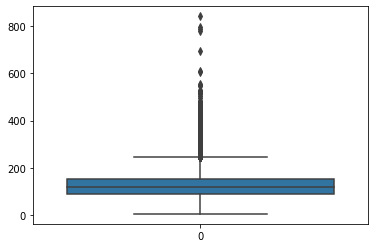

In [ ]:
import seaborn as sns

sns.boxplot(data=tweet_len)

10440.0